# Milk Quality Prediction 🥛🧪

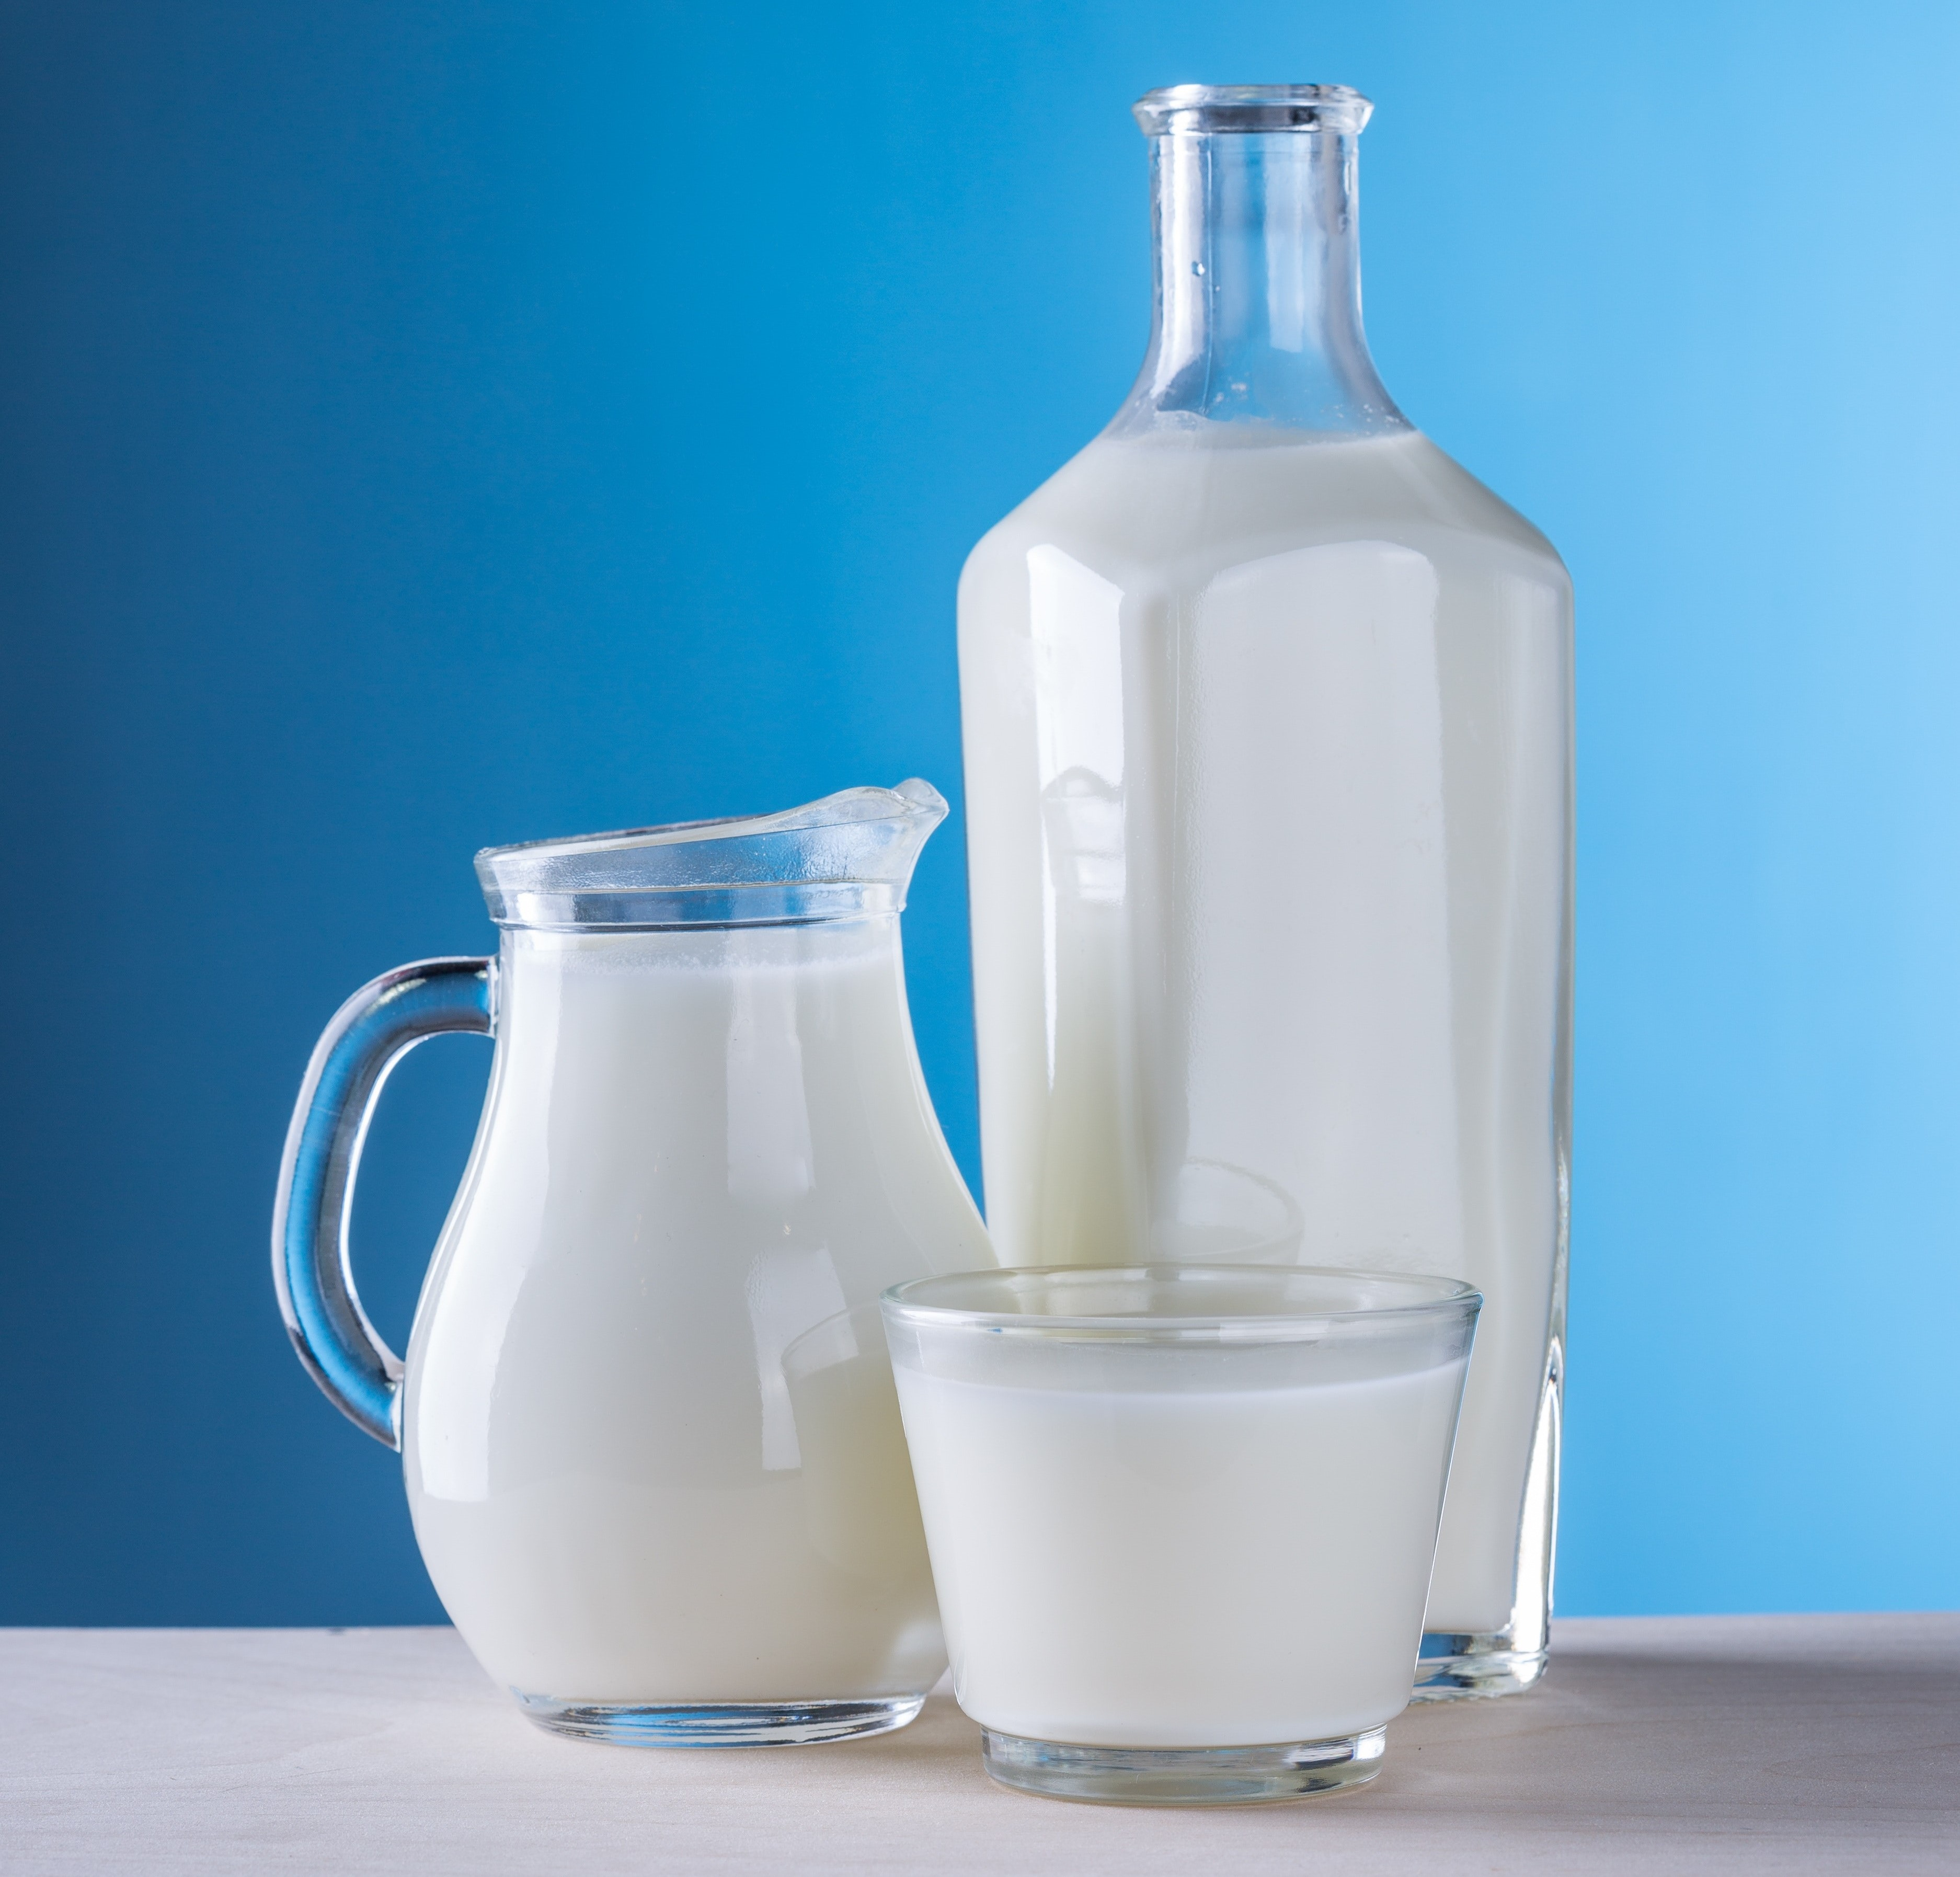

The Dataset Milk Quality Prediction is a Classification Dataset.

About dataset :-



> This dataset is manually collected from observations. 

> It helps us to build machine learning models to predict the quality of milk.
 
> This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
 
> Generally, the Grade or Quality of the milk depends on these parameters. 
 
> These parameters play a vital role in the predictive analysis of the milk.




Usage:-

> The target variable is nothing but the Grade of the milk. Which is :-
 
  >>1) Low (Bad)
  
  >>2) Medium (Moderate)
  
  >>3) High (Good)




 There are 7 Columns:-

  1) pH = A measure of how acidic or basic a substance or solution is PH, it is measured on a scale of 0 to 14.
  
  2) Temperature = Temperature is the degree of hotness or coldness of an object.
  
  3) Taste = The sensation of flavour perceived in the mouth and throat on contact with a substance.
  
  4) Odor = An odor is also called a "Smell" or a "Scent".
  
  5) Fat = The fat content of milk is the proportion of milk, by weight, made up by butterfat.
  
  6) Turbidity = The quality of being cloudy, opaque, or thick with suspended matter.
  
  7) Colour = The appearance of milk is White.
  



> If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
 
> Temperature and ph are given their actual values in the dataset.

> We have to perform data preprocessing, and data augmentation techniques to build statistical and predictive models to predict the quality of the milk.

# Importing Requried Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("milknew.csv")
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35.0,1,0.0,1.0,0,254.0,high
1,6.6,36.0,0,1.0,0.0,1,253.0,high
2,8.5,70.0,1,1.0,1.0,1,246.0,low
3,9.5,34.0,1,1.0,0.0,1,255.0,low
4,6.6,37.0,0,0.0,0.0,0,255.0,medium
...,...,...,...,...,...,...,...,...
1056,NaN,45.0,1,1.0,0.0,0,247.0,medium
1057,6.7,38.0,1,0.0,1.0,0,255.0,high
1058,3.0,40.0,1,1.0,1.0,1,255.0,low
1059,6.8,43.0,1,0.0,1.0,0,250.0,high


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1045 non-null   float64
 1   Temprature  1038 non-null   float64
 2   Taste       1061 non-null   int64  
 3   Odor        1058 non-null   float64
 4   Fat         1059 non-null   float64
 5   Turbidity   1061 non-null   int64  
 6   Colour      1048 non-null   float64
 7   Grade       1057 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 66.4+ KB


In [4]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1045.000000,1038.000000,1061.000000,1058.000000,1059.000000,1061.000000,1048.000000
mean,6.632919,44.218690,0.546654,0.431002,0.671388,0.491046,251.816794
std,1.404279,10.238212,0.498053,0.495451,0.469930,0.500156,4.313727
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [5]:
df = df.rename(columns={'Temprature': 'Temperature'})

In [6]:
df.head(2)

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35.0,1,0.0,1.0,0,254.0,high
1,6.6,36.0,0,1.0,0.0,1,253.0,high


# Checking Null Values and Filling It

In [7]:
df.isnull().sum()

pH             16
Temperature    23
Taste           0
Odor            3
Fat             2
Turbidity       0
Colour         13
Grade           4
dtype: int64

<AxesSubplot:>

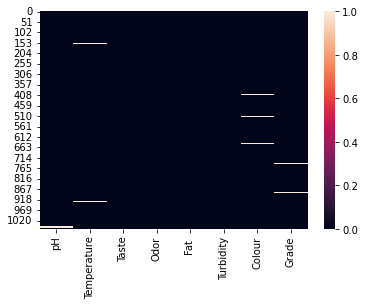

In [8]:
sns.heatmap(df.isnull())

In [9]:
df["pH"].value_counts()

6.8    246
6.5    184
6.6    157
6.7     80
3.0     69
9.0     61
8.6     40
7.4     38
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

In [10]:
phmean = df["pH"].mean()
df["pH"].fillna(phmean,inplace=True)
df["pH"].isnull().sum()

0

In [11]:
df["Temperature"].value_counts()

45.0    216
38.0    176
40.0    129
37.0     82
43.0     74
36.0     63
50.0     57
55.0     46
34.0     39
41.0     29
66.0     24
35.0     23
70.0     22
65.0     22
90.0     17
60.0     17
42.0      1
1.0       1
Name: Temperature, dtype: int64

In [12]:
temmean = df["Temperature"].mean()
df["Temperature"].fillna(temmean,inplace=True)
df["Temperature"].isnull().sum()

0

In [13]:
df["Colour"].value_counts()

255.0    618
250.0    146
245.0    114
247.0     48
246.0     44
240.0     32
248.0     23
253.0     22
254.0      1
Name: Colour, dtype: int64

In [14]:
colmean = df["Colour"].mean()
df["Colour"].fillna(colmean,inplace=True)
df["Colour"].isnull().sum()

0

In [15]:
df.isnull().sum()

pH             0
Temperature    0
Taste          0
Odor           3
Fat            2
Turbidity      0
Colour         0
Grade          4
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

<AxesSubplot:>

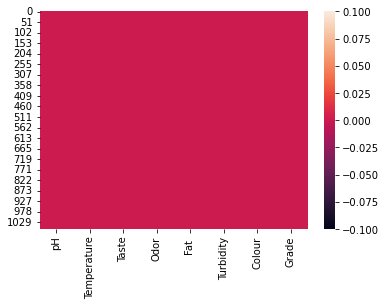

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1052 non-null   float64
 1   Temperature  1052 non-null   float64
 2   Taste        1052 non-null   int64  
 3   Odor         1052 non-null   float64
 4   Fat          1052 non-null   float64
 5   Turbidity    1052 non-null   int64  
 6   Colour       1052 non-null   float64
 7   Grade        1052 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 74.0+ KB


# Visualizing the Data

In [20]:
df.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35.0,1,0.0,1.0,0,254.0,high
1,6.6,36.0,0,1.0,0.0,1,253.0,high
2,8.5,70.0,1,1.0,1.0,1,246.0,low
3,9.5,34.0,1,1.0,0.0,1,255.0,low
4,6.6,37.0,0,0.0,0.0,0,255.0,medium


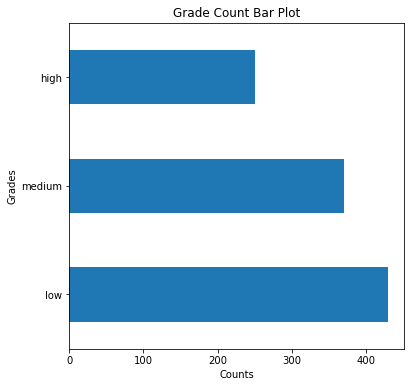

In [21]:
plt.figure(figsize=(6,6))

df["Grade"].value_counts().plot(kind="barh")

plt.title("Grade Count Bar Plot")
plt.xlabel("Counts")
plt.ylabel("Grades")
plt.show()

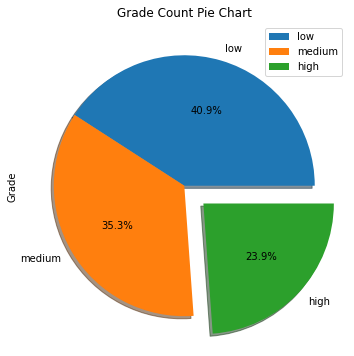

In [22]:
plt.figure(figsize=(8,6))
df["Grade"].value_counts().plot.pie(autopct="%1.1f%%",explode=(0,0,0.2),shadow=True)
plt.title("Grade Count Pie Chart")
plt.legend()
plt.show()

<AxesSubplot:xlabel='pH', ylabel='Count'>

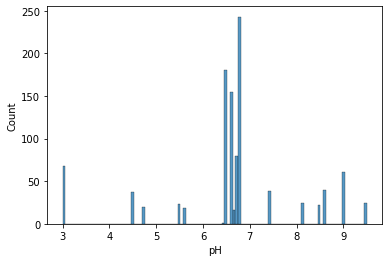

In [23]:
sns.histplot(df["pH"])

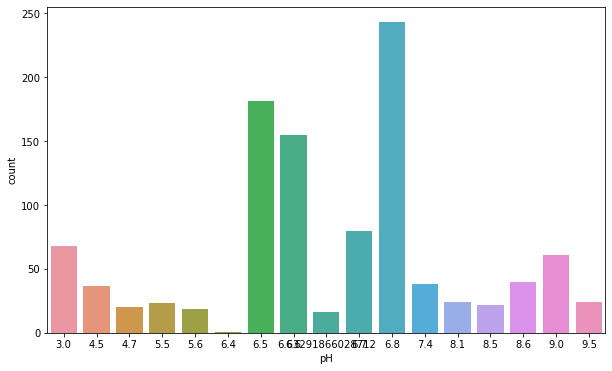

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(df["pH"])
plt.show()

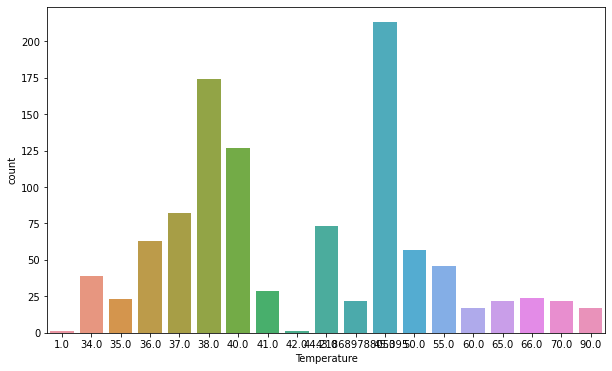

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(df["Temperature"])
plt.show()

<AxesSubplot:xlabel='Grade', ylabel='Temperature'>

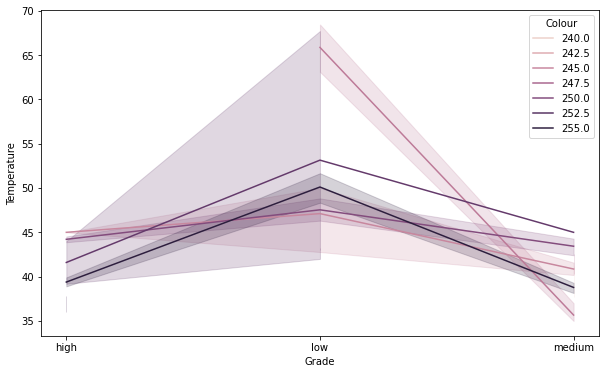

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Grade",y="Temperature",data=df,hue="Colour")

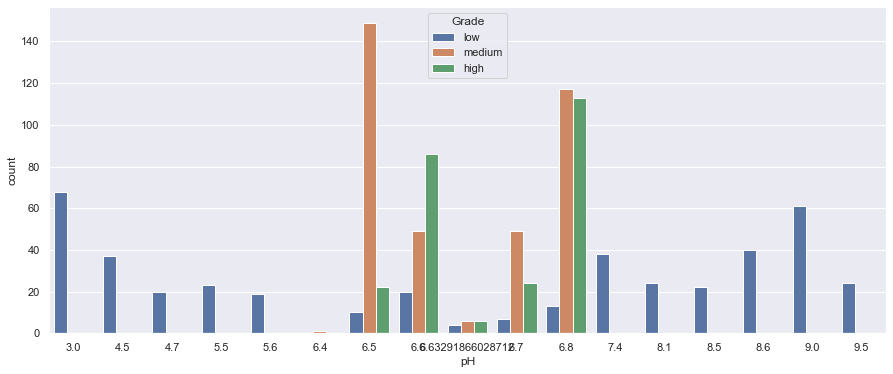

In [27]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.countplot(df["pH"],hue="Grade",hue_order=["low","medium","high"],data=df)
plt.show()

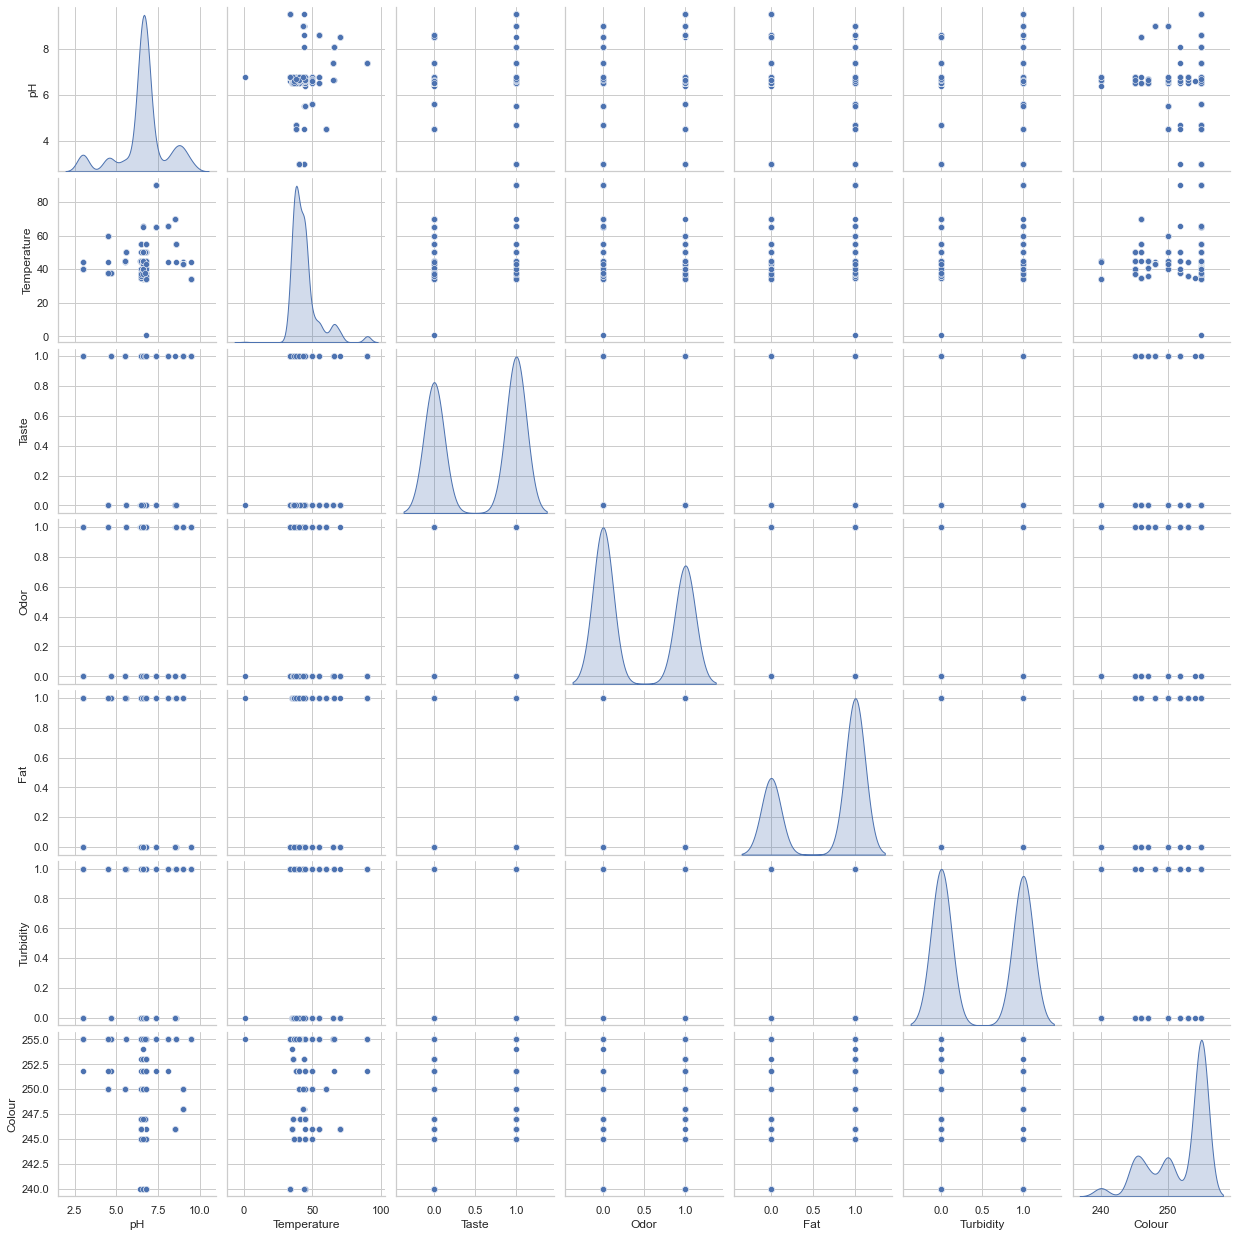

In [28]:
sns.set_style("whitegrid")
sns.pairplot(data=df, diag_kind="kde")

# Removing Outliers

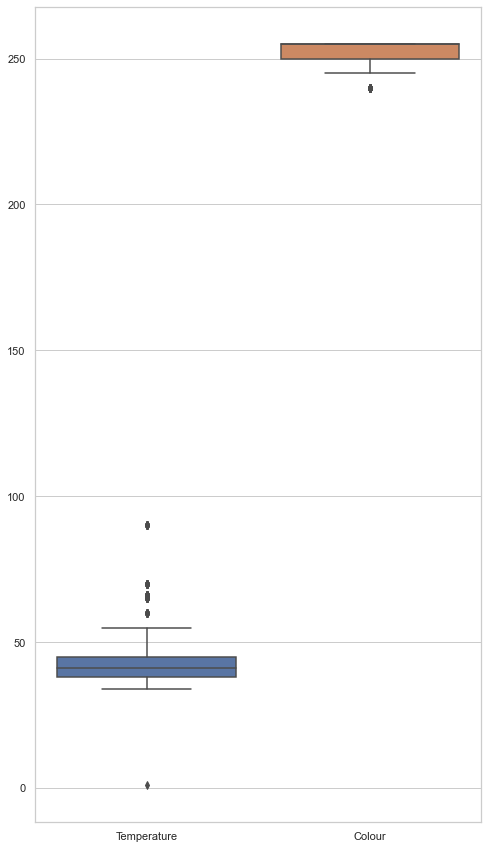

In [29]:
plt.figure(figsize=(8,15))
sns.boxplot(data=df[["Temperature","Colour"]])
plt.show()

In [30]:
df[(df.Temperature<20)]

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
504,6.8,1.0,0,0.0,1.0,0,255.0,medium


In [31]:
df.drop(504,axis=0,inplace=True)

<AxesSubplot:>

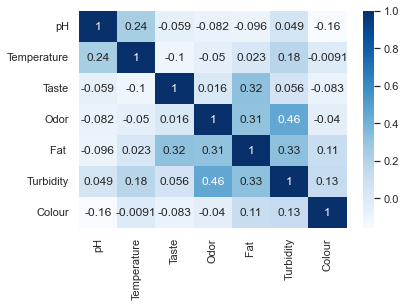

In [32]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

# Checking Skewness

In [33]:
from scipy.stats import skew

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1051 non-null   float64
 1   Temperature  1051 non-null   float64
 2   Taste        1051 non-null   int64  
 3   Odor         1051 non-null   float64
 4   Fat          1051 non-null   float64
 5   Turbidity    1051 non-null   int64  
 6   Colour       1051 non-null   float64
 7   Grade        1051 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 73.9+ KB


In [35]:
colname = df.select_dtypes("float64").columns
colname

Index(['pH', 'Temperature', 'Odor', 'Fat ', 'Colour'], dtype='object')

pH
-0.673701197923874


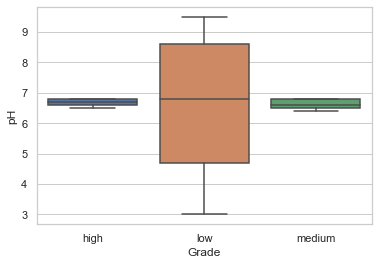

Temperature
2.2246834994459603


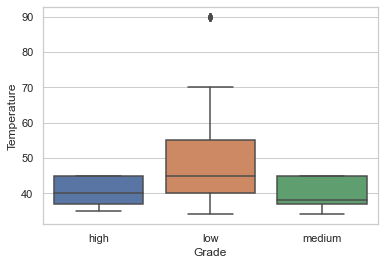

Odor
0.2785917870878296


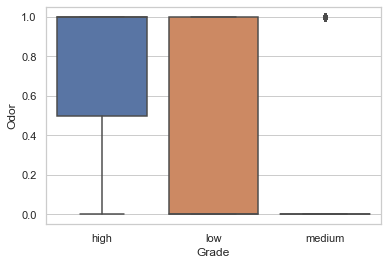

Fat 
-0.7268785291774904


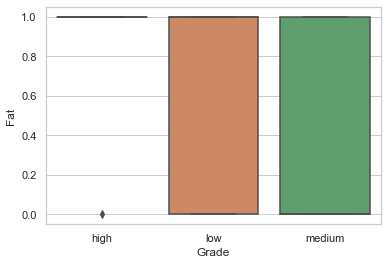

Colour
-1.0129904609144624


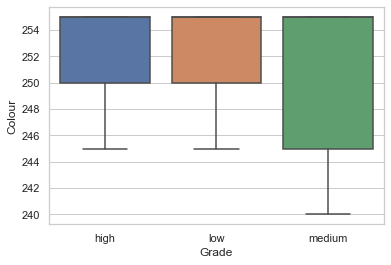

In [36]:
for col in df[colname]:
    print(col)
    print(skew(df[col]))
    
    sns.boxplot(data=df,x="Grade",y=df[col])
    plt.show()

# Lets Train The Dataset

In [37]:
df.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35.0,1,0.0,1.0,0,254.0,high
1,6.6,36.0,0,1.0,0.0,1,253.0,high
2,8.5,70.0,1,1.0,1.0,1,246.0,low
3,9.5,34.0,1,1.0,0.0,1,255.0,low
4,6.6,37.0,0,0.0,0.0,0,255.0,medium


In [38]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [39]:
x

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
0,6.600000,35.0,1,0.0,1.0,0,254.0
1,6.600000,36.0,0,1.0,0.0,1,253.0
2,8.500000,70.0,1,1.0,1.0,1,246.0
3,9.500000,34.0,1,1.0,0.0,1,255.0
4,6.600000,37.0,0,0.0,0.0,0,255.0
...,...,...,...,...,...,...,...
1056,6.632919,45.0,1,1.0,0.0,0,247.0
1057,6.700000,38.0,1,0.0,1.0,0,255.0
1058,3.000000,40.0,1,1.0,1.0,1,255.0
1059,6.800000,43.0,1,0.0,1.0,0,250.0


In [40]:
y

0         high
1         high
2          low
3          low
4       medium
         ...  
1056    medium
1057      high
1058       low
1059      high
1060       low
Name: Grade, Length: 1051, dtype: object

# Encoding Target Column from object to int

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df["Grade"])

In [42]:
y

array([0, 0, 1, ..., 1, 0, 1])

In [43]:
x.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35.0,1,0.0,1.0,0,254.0
1,6.6,36.0,0,1.0,0.0,1,253.0
2,8.5,70.0,1,1.0,1.0,1,246.0
3,9.5,34.0,1,1.0,0.0,1,255.0
4,6.6,37.0,0,0.0,0.0,0,255.0


# Scaling the data

In [44]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [45]:
df.iloc[:,:-1]=ss.fit_transform(df.iloc[:,:-1])

In [46]:
df.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,-0.025936,-0.920828,0.913349,-0.870359,0.700557,-0.978350,0.512520,high
1,-0.025936,-0.821586,-1.094872,1.148951,-1.427436,1.022129,0.279474,high
2,1.336032,2.552645,0.913349,1.148951,0.700557,1.022129,-1.351848,low
3,2.052857,-1.020070,0.913349,1.148951,-1.427436,1.022129,0.745566,low
4,-0.025936,-0.722344,-1.094872,-0.870359,-1.427436,-0.978350,0.745566,medium


# Cheking For Best Accuracy

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [49]:
def acccheck(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")
    
    print(classification_report(ytest,ypred))
    
    
    print(f">>>>>>>>>>>>>>>  Accuracy = {test}  <<<<<<<<<<<<<<<")
    return model

# Logistic Regression

In [50]:
acccheck(LogisticRegression())

Training Accuracy:- 0.6952380952380952
 Testing Accuracy:- 0.7025316455696202
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        74
           1       0.71      0.72      0.72       125
           2       0.72      0.89      0.79       117

    accuracy                           0.70       316
   macro avg       0.68      0.66      0.66       316
weighted avg       0.69      0.70      0.69       316

>>>>>>>>>>>>>>>  Accuracy = 0.7025316455696202  <<<<<<<<<<<<<<<


LogisticRegression()

# KNeighbors Classifier

In [51]:
acccheck(KNeighborsClassifier())

Training Accuracy:- 0.9809523809523809
 Testing Accuracy:- 0.9873417721518988
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       1.00      0.98      0.99       125
           2       0.98      0.99      0.99       117

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316

>>>>>>>>>>>>>>>  Accuracy = 0.9873417721518988  <<<<<<<<<<<<<<<


KNeighborsClassifier()

# Support Vector Classifier (SVC)

In [52]:
acccheck(SVC())

Training Accuracy:- 0.5387755102040817
 Testing Accuracy:- 0.5443037974683544
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       1.00      0.44      0.61       125
           2       0.45      1.00      0.62       117

    accuracy                           0.54       316
   macro avg       0.48      0.48      0.41       316
weighted avg       0.56      0.54      0.47       316

>>>>>>>>>>>>>>>  Accuracy = 0.5443037974683544  <<<<<<<<<<<<<<<


SVC()

# Decision Tree Classifier

In [53]:
acccheck(DecisionTreeClassifier())

Training Accuracy:- 1.0
 Testing Accuracy:- 0.9936708860759493
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.98      1.00      0.99       125
           2       1.00      0.99      1.00       117

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316

>>>>>>>>>>>>>>>  Accuracy = 0.9936708860759493  <<<<<<<<<<<<<<<


DecisionTreeClassifier()

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

# Bernoulli Naive Bayes

In [55]:
acccheck(BernoulliNB())

Training Accuracy:- 0.638095238095238
 Testing Accuracy:- 0.6234177215189873
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        74
           1       0.64      0.52      0.58       125
           2       0.65      0.85      0.74       117

    accuracy                           0.62       316
   macro avg       0.60      0.60      0.60       316
weighted avg       0.62      0.62      0.61       316

>>>>>>>>>>>>>>>  Accuracy = 0.6234177215189873  <<<<<<<<<<<<<<<


BernoulliNB()

# Gaussian Naive Bayes

In [56]:
acccheck(GaussianNB())

Training Accuracy:- 0.9455782312925171
 Testing Accuracy:- 0.9335443037974683
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        74
           1       1.00      0.92      0.96       125
           2       0.96      0.91      0.93       117

    accuracy                           0.93       316
   macro avg       0.93      0.94      0.93       316
weighted avg       0.94      0.93      0.93       316

>>>>>>>>>>>>>>>  Accuracy = 0.9335443037974683  <<<<<<<<<<<<<<<


GaussianNB()

# Multinomial Naive Bayes

In [57]:
acccheck(MultinomialNB())

Training Accuracy:- 0.6
 Testing Accuracy:- 0.6234177215189873
              precision    recall  f1-score   support

           0       0.46      0.35      0.40        74
           1       0.59      0.62      0.60       125
           2       0.73      0.80      0.77       117

    accuracy                           0.62       316
   macro avg       0.59      0.59      0.59       316
weighted avg       0.61      0.62      0.62       316

>>>>>>>>>>>>>>>  Accuracy = 0.6234177215189873  <<<<<<<<<<<<<<<


MultinomialNB()

In [58]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Ada Boost Classifier

In [59]:
acccheck(AdaBoostClassifier())

Training Accuracy:- 0.908843537414966
 Testing Accuracy:- 0.9050632911392406
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        74
           1       0.88      1.00      0.94       125
           2       1.00      0.74      0.85       117

    accuracy                           0.91       316
   macro avg       0.91      0.91      0.90       316
weighted avg       0.92      0.91      0.90       316

>>>>>>>>>>>>>>>  Accuracy = 0.9050632911392406  <<<<<<<<<<<<<<<


AdaBoostClassifier()

# Gradient Boosting Classifier

In [60]:
acccheck(GradientBoostingClassifier())

Training Accuracy:- 1.0
 Testing Accuracy:- 0.990506329113924
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       0.98      1.00      0.99       125
           2       1.00      0.97      0.99       117

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316

>>>>>>>>>>>>>>>  Accuracy = 0.990506329113924  <<<<<<<<<<<<<<<


GradientBoostingClassifier()

# Random Forest Classifier

In [61]:
acccheck(RandomForestClassifier())

Training Accuracy:- 1.0
 Testing Accuracy:- 0.9936708860759493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       0.98      1.00      0.99       125
           2       1.00      0.98      0.99       117

    accuracy                           0.99       316
   macro avg       0.99      0.99      0.99       316
weighted avg       0.99      0.99      0.99       316

>>>>>>>>>>>>>>>  Accuracy = 0.9936708860759493  <<<<<<<<<<<<<<<


RandomForestClassifier()

In [62]:
col = ["Models","Training_Accuracy","Testing_Accuracy"]

data = [
    ["Logistic_Regression","0.6952","0.7025"],
    ["KNeighbors_Classifier","0.9809","0.9873"],
    ["Support_Vector_Classifier","0.5387", "0.5443"],
    ["Decision_Tree_Classifier","1.0","0.9968"],
    ["Bernoulli_NB","0.6380","0.6234"],
    ["Gaussian_NB","0.9455","0.9335"],
    ["Multinomial_NB","0.6","0.6234"],
    ["AdaBoost_Classifier","0.9088","0.9050"],
    ["Gradient_Boosting_Classifier","1.0","0.9905"],
    ["Random_Forest_Classifier","1.0","0.9936"]

]

In [63]:
df2 = pd.DataFrame(data,columns=col)
df2

,Models,Training_Accuracy,Testing_Accuracy
0,Logistic_Regression,0.6952,0.7025
1,KNeighbors_Classifier,0.9809,0.9873
2,Support_Vector_Classifier,0.5387,0.5443
3,Decision_Tree_Classifier,1.0,0.9968
4,Bernoulli_NB,0.6380,0.6234
5,Gaussian_NB,0.9455,0.9335
6,Multinomial_NB,0.6,0.6234
7,AdaBoost_Classifier,0.9088,0.9050
8,Gradient_Boosting_Classifier,1.0,0.9905
9,Random_Forest_Classifier,1.0,0.9936


In [64]:
df3 = df2.sort_values(by="Testing_Accuracy",ascending=False)
accuracy = df3[["Models","Testing_Accuracy"]]
accuracy

,Models,Testing_Accuracy
3,Decision_Tree_Classifier,0.9968
9,Random_Forest_Classifier,0.9936
8,Gradient_Boosting_Classifier,0.9905
1,KNeighbors_Classifier,0.9873
5,Gaussian_NB,0.9335
7,AdaBoost_Classifier,0.9050
0,Logistic_Regression,0.7025
4,Bernoulli_NB,0.6234
6,Multinomial_NB,0.6234
2,Support_Vector_Classifier,0.5443


In [65]:
accuracy.head()

,Models,Testing_Accuracy
3,Decision_Tree_Classifier,0.9968
9,Random_Forest_Classifier,0.9936
8,Gradient_Boosting_Classifier,0.9905
1,KNeighbors_Classifier,0.9873
5,Gaussian_NB,0.9335


# Hence, The Maximum Accuracy we get Here is through Decision Tree Classifier

# So we train the model with Decision Tree Classifier for Predictions

In [66]:
dt = acccheck(DecisionTreeClassifier())

Training Accuracy:- 1.0
 Testing Accuracy:- 0.9968354430379747
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       0.99      1.00      1.00       125
           2       1.00      0.99      1.00       117

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316

>>>>>>>>>>>>>>>  Accuracy = 0.9968354430379747  <<<<<<<<<<<<<<<


# New Observation Prediction

In [67]:
def predict():
    ph = float(input("Enter A pH Value in Range of 0 to 14 :- "))
    tem = int(input("Enter A Temprature Value in Range of 1 to 90 :- "))
    tst = int(input("Enter 1 If you Got A Taste if Not then Enter 0 :- "))
    odr = int(input("Enter 1 If you Got A Odor if Not then Enter 0  :- "))
    fat = int(input("Enter 1 If you Got A Fat if Not then Enter 0  :- "))
    tur = int(input("Enter 1 If you Got A Turbidity if Not then Enter 0  :- "))
    clr = int(input("Enter A Colour Value in Range of 240 to 255:- "))
    
    newob = [ph,tem,tst,odr,fat,tur,clr]

    pr = dt.predict([newob])[0]
    
    if pr==0:
        print("\n Nice Superbb Your Milk Grade is \n HIGH  !!!!!")
    elif pr==1:
        print("\n Good Your Milk Grade is \n LOW !")
    else :
        print("\n Nice Your Milk Grade is \n MEDIUM !!!")
    return pr

In [68]:
dff = pd.read_csv("milknew.csv")
dff.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35.0,1,0.0,1.0,0,254.0,high
1,6.6,36.0,0,1.0,0.0,1,253.0,high
2,8.5,70.0,1,1.0,1.0,1,246.0,low
3,9.5,34.0,1,1.0,0.0,1,255.0,low
4,6.6,37.0,0,0.0,0.0,0,255.0,medium


In [69]:
predict()

Enter A pH Value in Range of 0 to 14 :- 8.5
Enter A Temprature Value in Range of 1 to 90 :- 70
Enter 1 If you Got A Taste if Not then Enter 0 :- 1
Enter 1 If you Got A Odor if Not then Enter 0  :- 1
Enter 1 If you Got A Fat if Not then Enter 0  :- 1
Enter 1 If you Got A Turbidity if Not then Enter 0  :- 1
Enter A Colour Value in Range of 240 to 255:- 246

 Good Your Milk Grade is 
 LOW !


1

In [70]:
predict()

Enter A pH Value in Range of 0 to 14 :- 6.6
Enter A Temprature Value in Range of 1 to 90 :- 37
Enter 1 If you Got A Taste if Not then Enter 0 :- 0
Enter 1 If you Got A Odor if Not then Enter 0  :- 0
Enter 1 If you Got A Fat if Not then Enter 0  :- 0
Enter 1 If you Got A Turbidity if Not then Enter 0  :- 0
Enter A Colour Value in Range of 240 to 255:- 255

 Nice Your Milk Grade is 
 MEDIUM !!!


2

In [72]:
predict()

Enter A pH Value in Range of 0 to 14 :- 6.6
Enter A Temprature Value in Range of 1 to 90 :- 36
Enter 1 If you Got A Taste if Not then Enter 0 :- 0
Enter 1 If you Got A Odor if Not then Enter 0  :- 1
Enter 1 If you Got A Fat if Not then Enter 0  :- 0
Enter 1 If you Got A Turbidity if Not then Enter 0  :- 1
Enter A Colour Value in Range of 240 to 255:- 253

 Nice Superbb Your Milk Grade is 
 HIGH  !!!!!


0

# Conclusion

In this project of Milk Quality Prediction (Classiification) we have to predict the Grade of the Milk.

First we clean the data by checking if there are no null values or columns are in the correct datatype form.

Then we Visualize the dataset by the using of various tool like countplot,distplot,histplot,heatmap and pie diagram.

Then we Encode the Columns in int form which are in object form.

Then we do Scaling of the Data.

After All this we build the model by applying algorithms.

All the models are working properly and the Decision Tree Classifier gives the Highest Accuracy Score.

So we predict New Observation by using Decision Tree Classifier.
